# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [10]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [5]:
# pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 640.0 kB/s eta 0:01:01
   ---------------------------------------- 0.0/38.8 MB 326.8 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.8 MB 508.4 kB/s eta 0:01:17
   ---------------------------------------- 0.1/38.8 MB 502.0 kB/s eta 0:01:18
   ---------------------------------------- 0.2/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 724.0 kB/s eta 0:00:54
   ---------------------------------------- 0.2/38.8 MB 752.5 kB/s eta 0:00:52
   ---------------------------------------- 0.3/38.8 MB 846.5 kB/s eta 0:00:46
   ---------------------------------------- 0.4/38.8 MB 849.3 kB/s eta 0:00:46
   ---------------------------------------- 0.4/38.8 MB 844.5 kB/s eta 0:00:46
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0

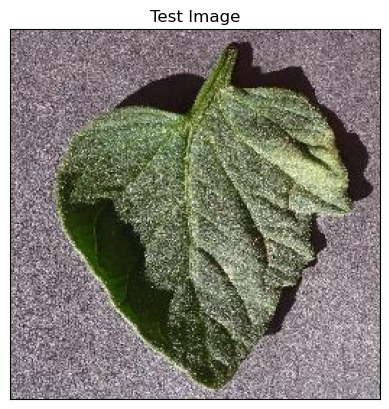

In [22]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoHealthy1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [24]:
print(predictions)
predictions.shape

[[1.6840612e-14 2.1820824e-18 4.6957463e-16 3.6409444e-13 6.8932124e-17
  3.4882056e-12 7.5836216e-20 2.3741228e-15 1.9805731e-18 3.1805710e-19
  5.7730192e-18 2.3192009e-19 4.2484704e-17 4.5930563e-19 3.5225441e-20
  1.6138173e-17 3.8053855e-17 1.4341548e-17 6.2990982e-19 1.1457390e-18
  1.8660961e-14 8.5094970e-21 1.0402845e-14 2.1222134e-17 4.9403370e-18
  4.0536116e-12 6.5300826e-14 3.8273221e-18 1.7615534e-16 4.1806874e-18
  1.8524685e-13 1.0156635e-13 7.1377488e-14 5.5116891e-15 1.6334786e-10
  6.7855047e-20 3.7928907e-18 1.0000000e+00]]


(1, 38)

In [25]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

37


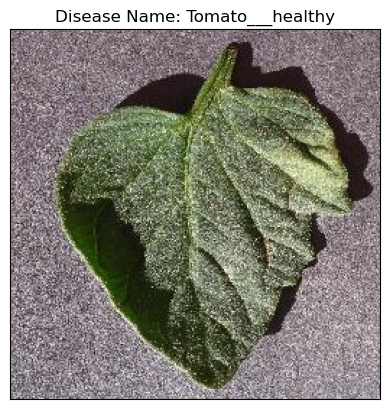

In [26]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model_prediction

'Tomato___healthy'